In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib
import scipy.stats
%matplotlib inline

In [8]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set(font='serif', font_scale=1.4)
sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

In [9]:
def format_func(value, tick_number):
    N = int(np.round(value / 100000))
    return "{0}e5".format(N)

## Off-Policy Results

In [47]:
def name2color(name):
    if 'bc' in name:
        return 'gray'
    elif 'gail' in name:
        return 'gray'
    elif 'sqil' in name:
        return "#4BACC6"
    elif 'dice' in name:
        return "#4BACC6"
    elif 'adril' in name:
        return '#F79646'
    elif 'advil' in name:
        return '#F79646'
    elif name == 'expert':
        return '#008000'

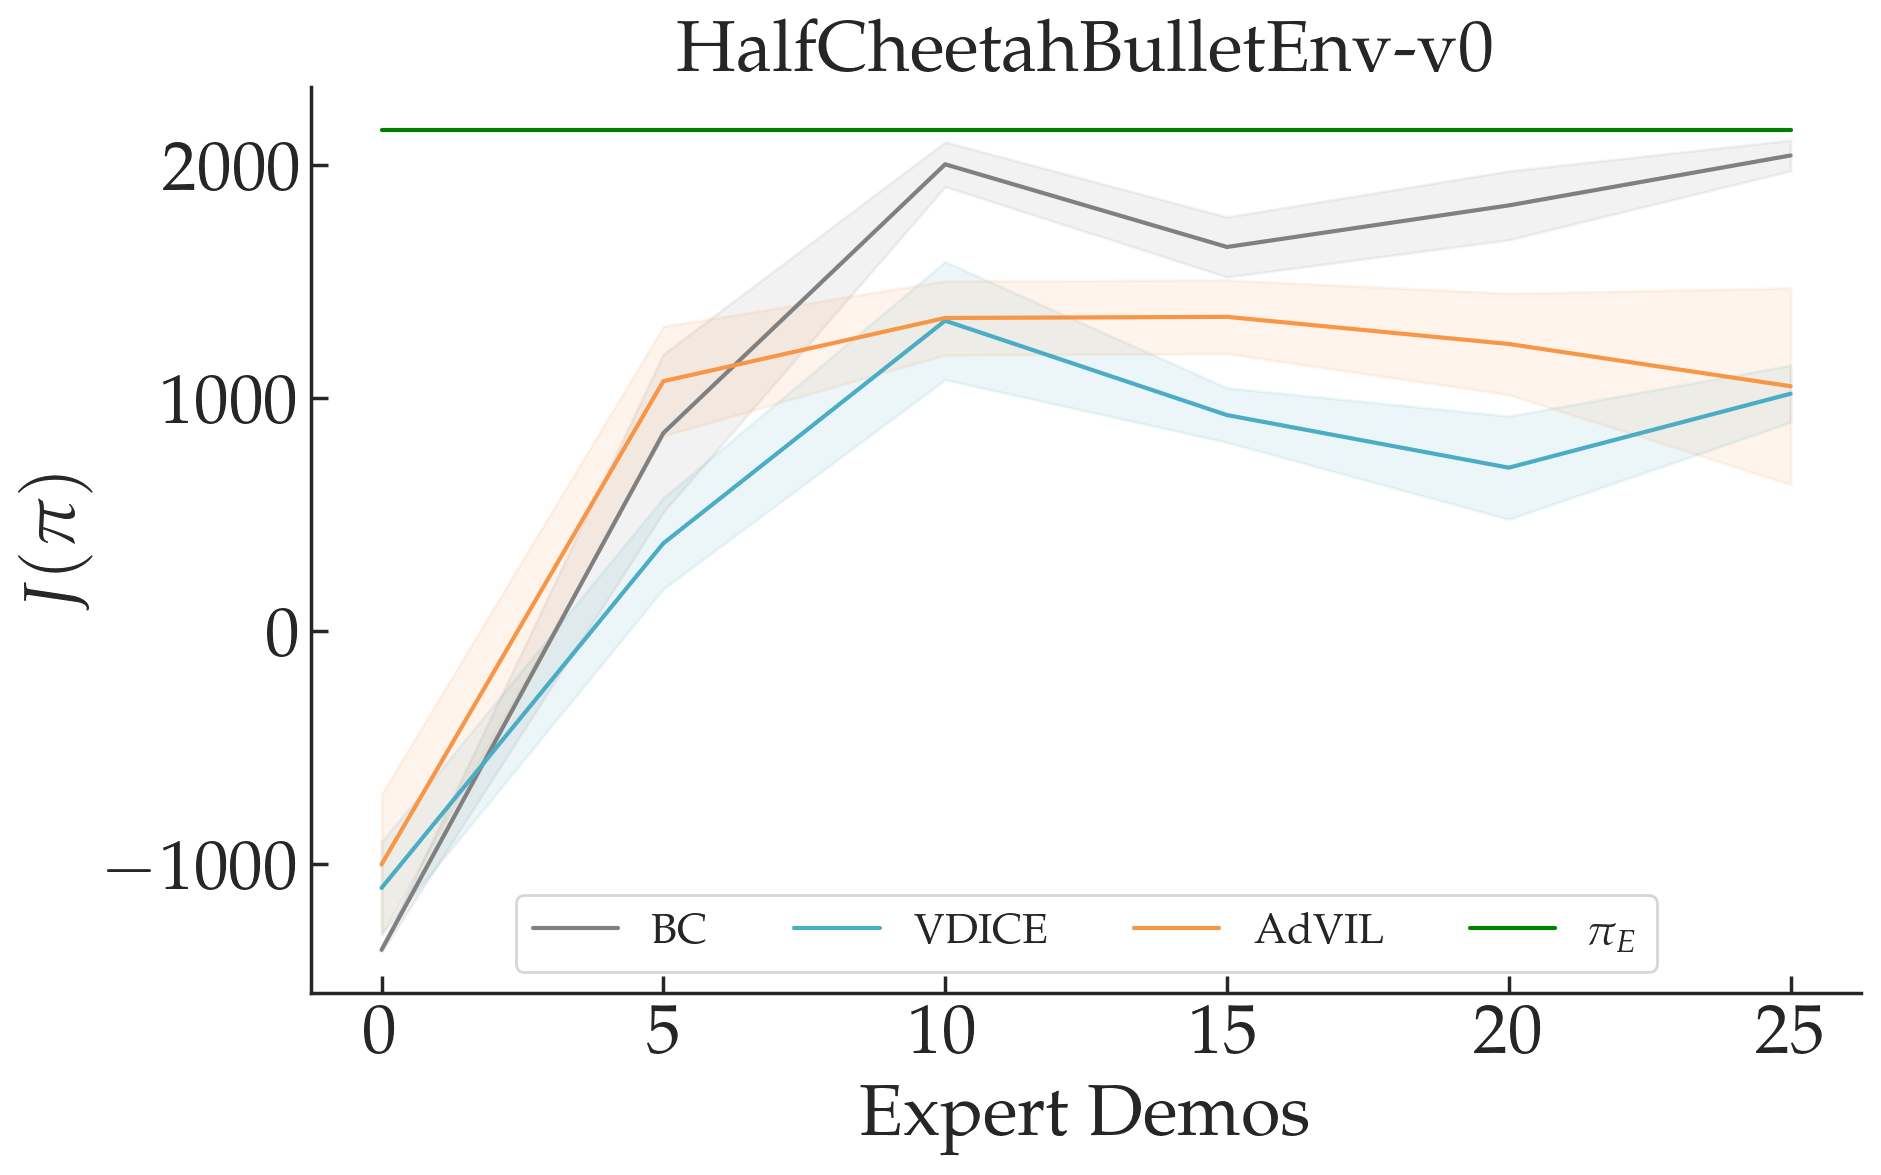

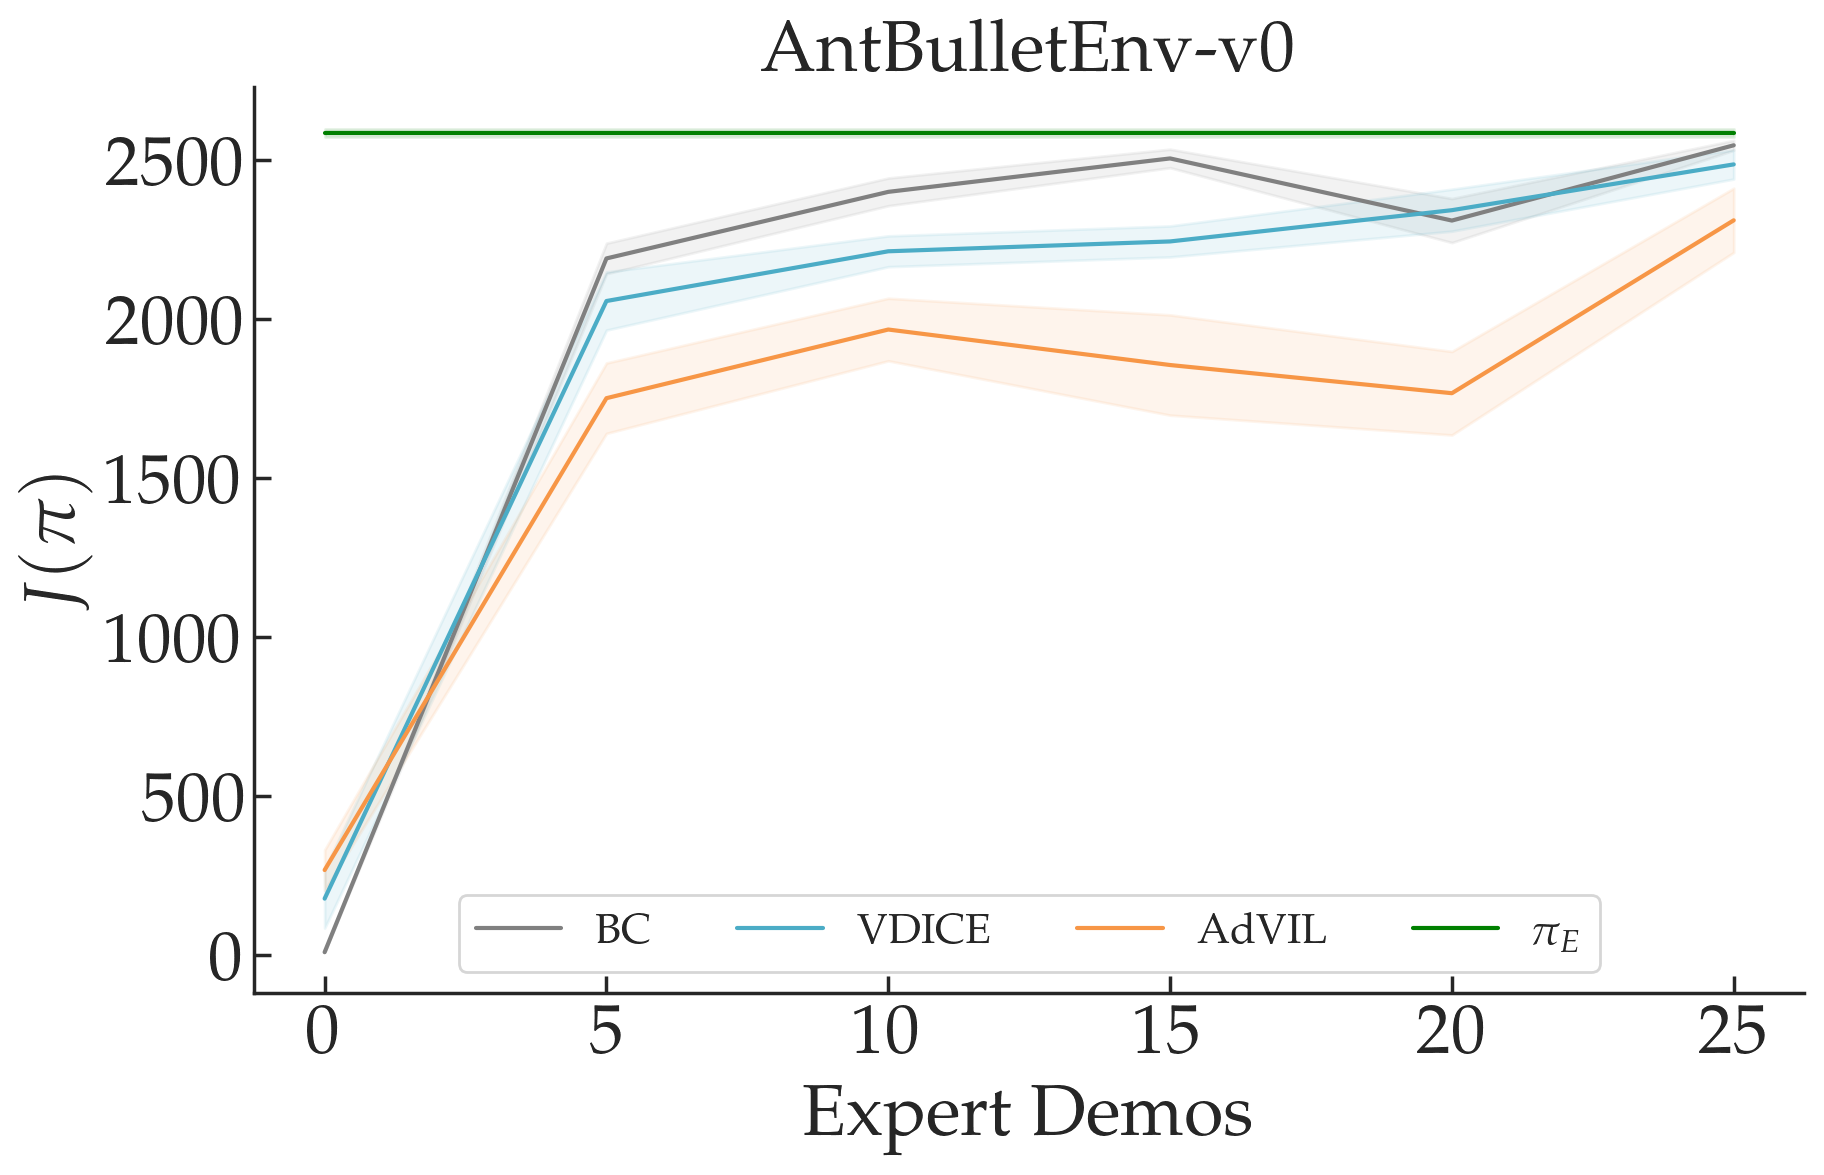

In [83]:
methods = ['bc', 'valuedice', 'advil']
environments = ['HalfCheetahBulletEnv-v0', 'AntBulletEnv-v0'] # # 
n = 5
step = 5
for env in environments:
    fig = plt.figure(dpi=200, figsize=(10.0,6.0))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.title(env,  y=1.0, fontsize=26)
    for method in methods:
        means = None
        for run in range(0, n):
            res = np.load(os.path.join("../data/pillbox/learners", env, "{0}_rewards_{1}.npz".format(method, run)))
            if run == 0:
                means = np.reshape(res['means'], (1, -1))
            else:
                curr = np.reshape(res['means'], (1, -1))
                if curr.shape[-1] != means.shape[-1]:
                    temp = np.mean(means, axis=0).reshape(1, -1)
                    temp[0, 0:curr.shape[-1]] = curr
                    curr = temp
                means = np.concatenate([means, curr], axis=0)
        if method == "bc":
            method = "BC"
        elif method == "valuedice":
            method = "VDICE"
        elif "advil" in method:
            method = "AdVIL"
        mean = np.mean(means, axis=0)
        std = np.std(means, axis=0)
        num_pts = len(mean)
        plt.plot(np.arange(num_pts) * step, mean, color = name2color(method.lower()), label=method, zorder=1)
        plt.fill_between(np.arange(num_pts) * step,
                         mean - (std / np.sqrt(n)),
                         mean + (std / np.sqrt(n)),
                         color = name2color(method.lower()),
                         alpha = 0.1)
    expert_res = np.load(os.path.join("experts", env, "demos.npz"))
    plt.plot(np.arange(num_pts) * step, [expert_res['mean_reward']] * num_pts, color = name2color("expert"), label='$\pi_E$', zorder=1)
    plt.fill_between(np.arange(num_pts) * step, [expert_res['mean_reward'] - (expert_res['std_reward'] / np.sqrt(10))] * num_pts,
                         [expert_res['mean_reward'] + (expert_res['std_reward'] / np.sqrt(10))] * num_pts,
                         color = name2color("expert"),
                         alpha = 0.1, zorder=-1)
    plt.legend(ncol=4, loc="lower center")
    plt.xlabel("Expert Demos", fontsize=26)
    ext = plt.ylabel("$J(\pi)$", fontsize=26)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 25)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 25)
    ax.tick_params(direction='in')
    plt.savefig(env +"_off" + ".svg", dpi=1000, bbox_inches='tight')
    plt.show()

## On-Policy Results

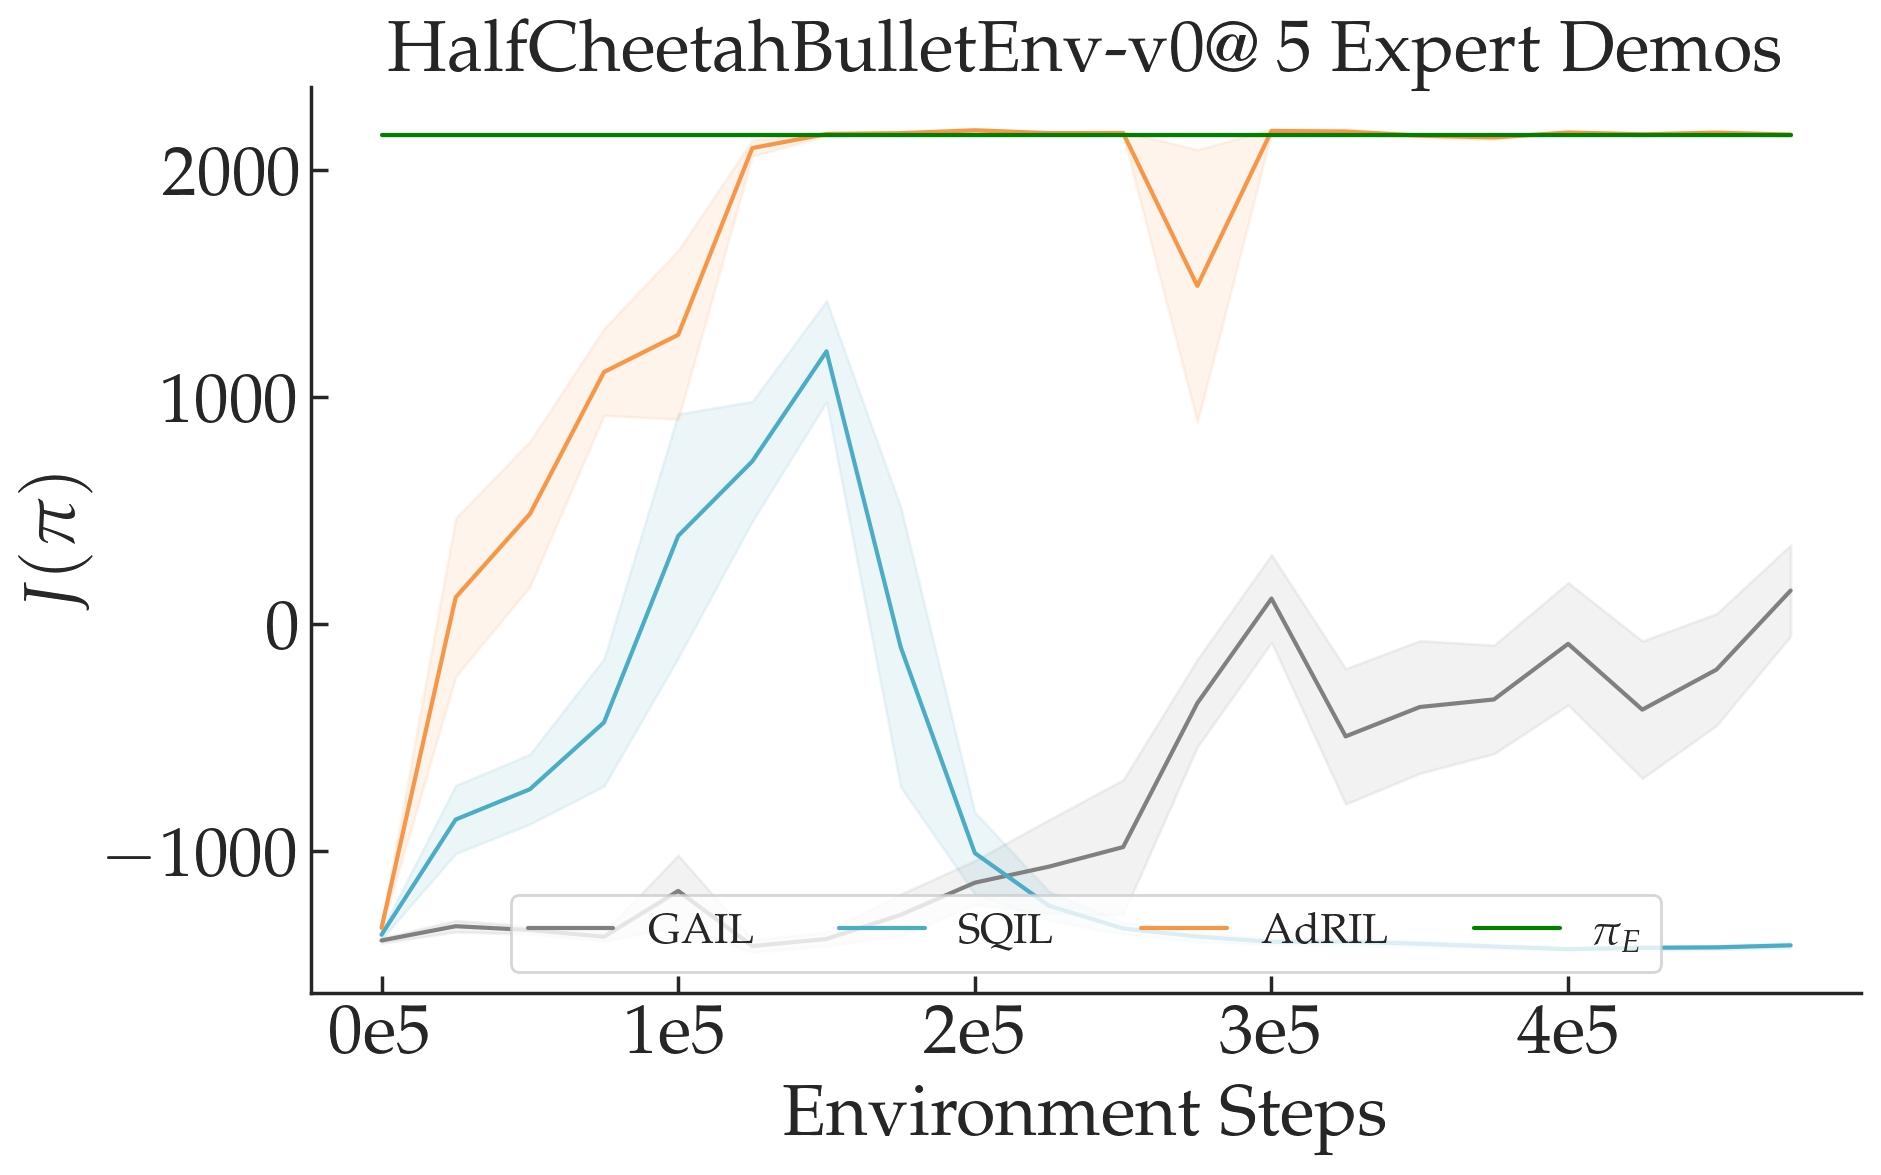

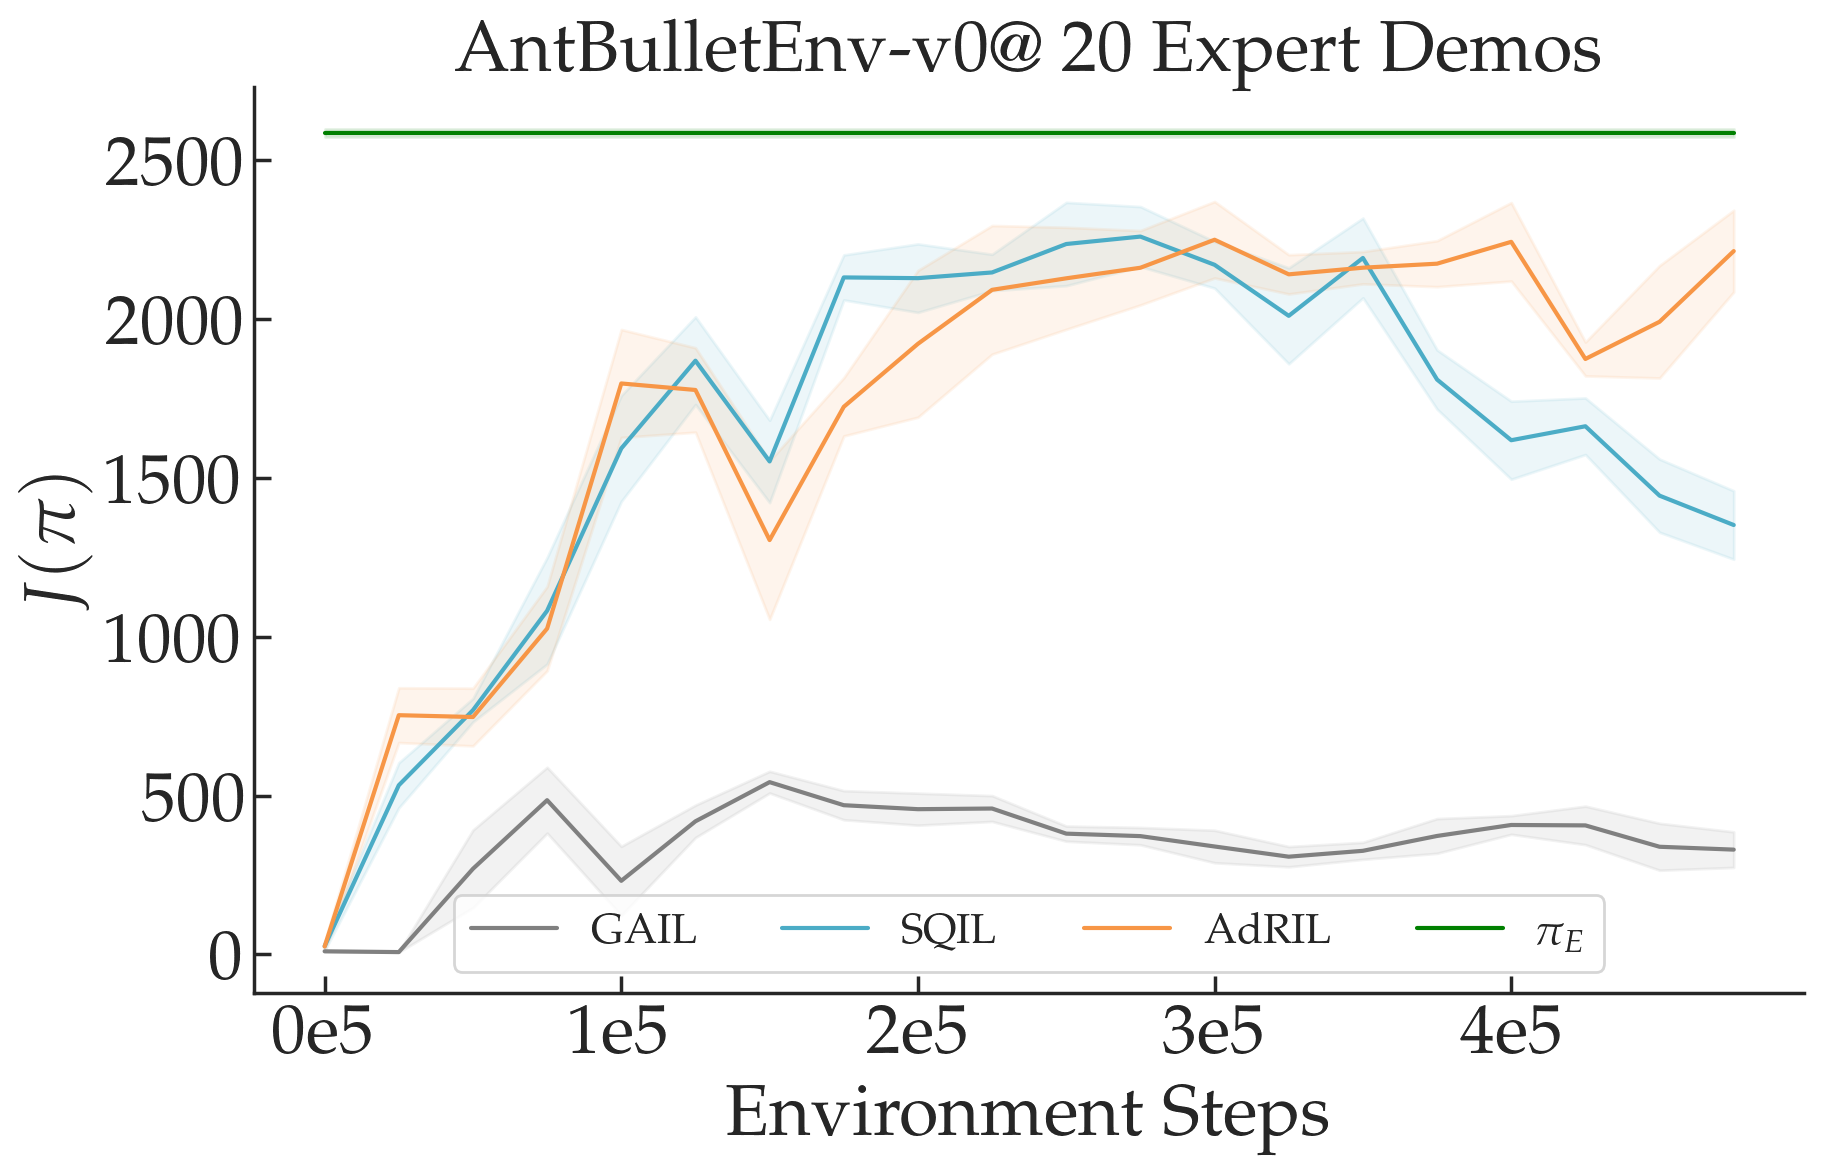

In [84]:
methods = ['gail', 'sqil', 'adrilb']
environments = ['HalfCheetahBulletEnv-v0', 'AntBulletEnv-v0']
n = 5
step = 25000
for env in environments:
    fig = plt.figure(dpi=200, figsize=(10.0,6.0))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if "Ant" in env:
        plt.title(env + "@ 20 Expert Demos",  y=1.0, fontsize=26)
    elif "Half" in env:
        plt.title(env + "@ 5 Expert Demos",  y=1.0, fontsize=26)
    for method in methods:
        if 'Half' in env and 'adril' in method:
            method = method[:-1]
        means = None
        for run in range(0, n):
            res = np.load(os.path.join("../data/pillbox/learners", env, "{0}_rewards_{1}.npz".format(method, run)))
            if run == min_run:
                means = np.reshape(res['means'], (1, -1))
            else:
                curr = np.reshape(res['means'], (1, -1))
                if curr.shape[-1] != means.shape[-1]:
                    temp = np.mean(means, axis=0).reshape(1, -1)
                    temp[0, 0:curr.shape[-1]] = curr
                    curr = temp
                means = np.concatenate([means, curr], axis=0)
        if method == "sqil":
            method = "SQIL"
        elif method == "gail":
            method = "GAIL"
        elif "adril" in method:
            method = "AdRIL"
        mean = np.mean(means, axis=0)
        std = np.std(means, axis=0)
        num_pts = len(mean)
        plt.plot(np.arange(num_pts) * step, mean, color = name2color(method.lower()), label=method, zorder=1)
        plt.fill_between(np.arange(num_pts) * step,
                         mean - (std / np.sqrt(n)),
                         mean + (std / np.sqrt(n)),
                         color = name2color(method.lower()),
                         alpha = 0.1)
    expert_res = np.load(os.path.join("experts", env, "demos.npz"))
    plt.plot(np.arange(num_pts) * step, [expert_res['mean_reward']] * num_pts, color = name2color("expert"), label='$\pi_E$', zorder=1)
    plt.fill_between(np.arange(num_pts) * step, [expert_res['mean_reward'] - (expert_res['std_reward'] / np.sqrt(10))] * 20,
                         [expert_res['mean_reward'] + (expert_res['std_reward'] / np.sqrt(10))] * num_pts,
                         color = name2color("expert"),
                         alpha = 0.1, zorder=-1)
    plt.legend(ncol=4, loc="lower center")
    plt.xlabel("Environment Steps", fontsize=26)
    ext = plt.ylabel("$J(\pi)$", fontsize=26)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 25)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 25)
    ax.tick_params(direction='in')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.savefig(env +"_on" + ".svg", dpi=1000, bbox_inches='tight')
    plt.show()